In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_excel('./ML Project_customer_product.xlsx')  
data2 = pd.read_excel('./ML Project_product_interaction.xlsx')  

In [3]:
data1.head()

,product_label,product_id,product_category,product_major,product_brand,Price,case_qty,ordr_qty,customer_label,cuisine,transaction_date,customer_id_partially_masked
0,1150536,7187101,CANNED AND DRY,BAKING NEEDS,GHIRARDELLI,1.7,1,1,2948714,DEL,2021-12-19,1***0
1,2049209,7066461,SEAFOOD,FRZN PREPRD SFD,PORTICO CLASSIC SEAFOOD,1.7,1,1,2948714,DEL,2021-12-19,1***0
2,874129,7203474,POULTRY,POULTRY FRESH,CHARIS CLASSIC,1.7,2,2,2948714,DEL,2021-12-19,1***0
3,1967472,4909499,PRODUCE,VEGETABLE FRESH,PACKER,1.7,1,1,2948714,DEL,2021-12-19,1***0
4,346288,4096368,CANNED AND DRY,SAUCES/SAUC MIX,CHARIS IMPERIAL,1.7,0,1,2948714,DEL,2021-12-19,1***0


In [4]:
data2.head()

,product_id,transaction_date,timestamp,customer_id
0,7160636.0,2022-03-14,2022-03-14 20:30:55.000000,ijisi2
1,3041183.0,2022-03-14,2022-03-14 14:21:03.000000,ic299j
2,5117062.0,2022-03-14,2022-03-14 14:52:25.000000,sss6rj
3,4645412.0,2023-02-13,2023-02-13 16:48:48.000000,6sissi
4,2146470.0,2023-06-23,2023-06-23 15:23:34.000000,ij9chj


In [5]:
unique_customers = data2["customer_id"].unique()
unique_customers

array(['ijisi2', 'ic299j', 'sss6rj', '6sissi', 'ij9chj', '526s92',
       'i25r92', 'i22c6j', '55shir', 'ic6ijh', 'r5sh5s', 'sss666',
       'iciiic', 'ijr2rc', 'ic9ccc', '59925i', 'sss625', 'h9iicj',
       'hhr65s', 'h9rss9', 'ijirrr', 'ijirrh', 'ijrsj5', 'ijc2ii',
       'rj9622', 'ij9hjc', 'i2rcr6', 'h5ir66', '6c6962', '69s2ji',
       'ijc5r9', 'hss25s', 'h62ih2', 'ijjshs', 'ijcisr', 'i22j92',
       '69ir6r', 'ijh5is', 'i2si6c', '26rsrj', 'rs6c9h', 'icirr9',
       'ij695h', 'i262rh', 'i26c55', 'i2js2j', 'i2s69r', '6c6s5c',
       'i22cj6', 'ijir5i', 'rrsrj6', 'i22jh9', 'ijh655', 'i2jsc2',
       'jj6csi', 'h99i5i', 'ij2c9c', 'r99rsr', 'ijri22', 'icisj5',
       'i2j6ss', 'i2jscs', 'ijs9s9', 'ijci9r', 'ijihr2', 'ijc92j',
       'i2cchs', 'i252i9', 'ijj9rj', 'ij2s59', '2hrhih', 'ijs2ji',
       'ic9ihs', 'ijjjsi', '5jjssh', 'ij6c6r', 'ijir55', 'iji2i9',
       'i2jrjc', 'i2r9ji', 'ij6hc5', '5ji6hc', 'hi695r', 'ijri92',
       '2c5j2c', 'i2s9s6', 'i2rs69', 'i2ji6s', 'ic29cc', 'h5ir

In [6]:
df = pd.DataFrame(unique_customers, columns=['name'])
df.to_csv('customers.csv', index=False)
df

,name
0,ijisi2
1,ic299j
2,sss6rj
3,6sissi
4,ij9chj
...,...
485,icjcj9
486,ij669c
487,i2629i
488,iji6s5


In [6]:
merged_df = data1.merge(data2, on=["product_id","transaction_date"], how="inner") #merging the two dataset with pandas merge

# Displaying the merged dataset
merged_df

,product_label,product_id,product_category,product_major,product_brand,Price,case_qty,ordr_qty,customer_label,cuisine,transaction_date,customer_id_partially_masked,timestamp,customer_id
0,1247363,8071536,PAPER & DISP,PLATES BOWLS,ANCHOR PACKAGING,1.700,2,2,2948714,DEL,2021-12-19,1***0,2021-12-19 13:58:45.000000,h9iicj
1,1247363,8071536,PAPER & DISP,PLATES BOWLS,ANCHOR PACKAGING,1.700,1,1,5101946,NaN,2021-12-19,3***4,2021-12-19 13:58:45.000000,h9iicj
2,1247363,8071536,PAPER & DISP,PLATES BOWLS,ANCHOR PACKAGING,105.587,1,1,3670941,AMR,2021-12-19,3***6,2021-12-19 13:58:45.000000,h9iicj
3,1247363,8071536,PAPER & DISP,PLATES BOWLS,ANCHOR PACKAGING,1.700,4,4,707835787,111,2021-12-19,8***7,2021-12-19 13:58:45.000000,h9iicj
4,1045143,9556481,POULTRY,POULTRY FRESH,CHARIS CLASSIC,1.700,10,10,2948714,DEL,2021-12-19,1***0,2021-12-19 16:55:13.000000,sss666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75318,295569,3865292,PRODUCE,JUICE/DRINK REF,CHARIS NATURAL,1.700,1,1,707835787,111,2023-04-17,8***7,2023-04-17 13:54:09.000000,59925i
75319,295569,3865292,PRODUCE,JUICE/DRINK REF,CHARIS NATURAL,1.700,1,1,707835787,111,2023-04-17,8***7,2023-04-17 15:36:57.000000,sss6rj
75320,771715,6533939,CANNED AND DRY,SALT/SEASN/SPCE,MCCORMICK & CO,1.700,0,2,707835787,111,2023-04-17,8***7,2023-04-17 16:54:19.000000,59925i
75321,1235016,7990092,PAPER & DISP,LIDS,ANCHOR PACKAGING,1.700,1,1,707835787,111,2023-04-17,8***7,2023-04-17 16:34:21.000000,sss666


In [19]:
# Extracting relevant columns for clustering
X = merged_df[['product_id', 'timestamp']]

# Converting timestamp strings to numerical values (e.g., seconds since a reference date)
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
reference_date = datetime(2020, 1, 1)  # Choose a reference date
merged_df['timestamp_seconds'] = (merged_df['timestamp'] - reference_date).dt.total_seconds()

In [20]:

# Creating a new DataFrame with the features for clustering
X_clustering = merged_df[['product_id', 'timestamp_seconds']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [22]:

optimal_k = 3

# Applying K-Means clustering with the chosen K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

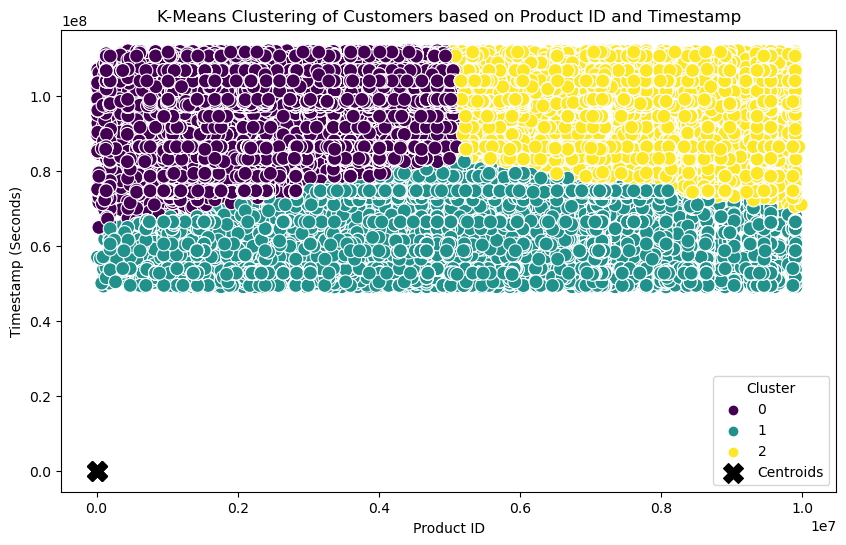

In [23]:



# plotting an getting the cluster centroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='product_id', y='timestamp_seconds', hue='Cluster', palette='viridis', s=100)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.legend(title='Cluster')
plt.title('K-Means Clustering of Customers based on Product ID and Timestamp')
plt.xlabel('Product ID')
plt.ylabel('Timestamp (Seconds)')
plt.show()


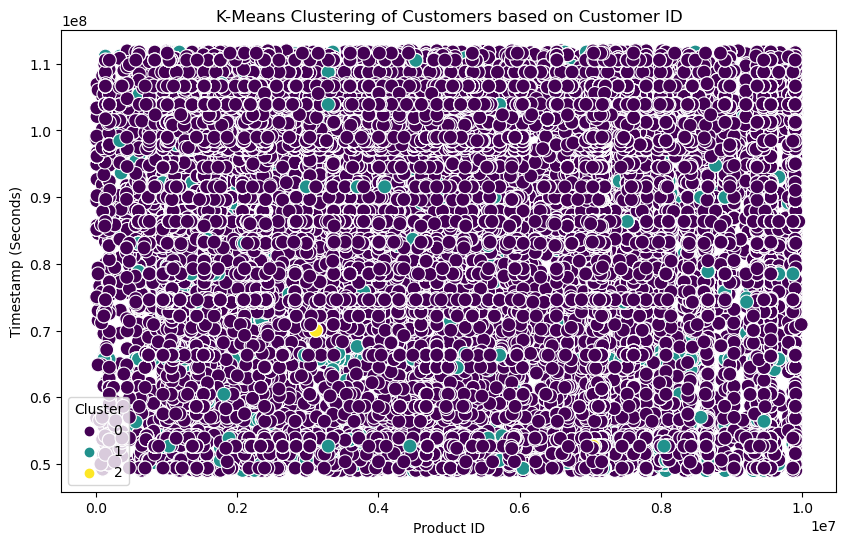

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already merged the datasets and stored them in merged_df

# Extract relevant columns for clustering
X = merged_df[['customer_id']]

# Create a new DataFrame with the features for clustering
X_clustering = merged_df[['customer_id']]

# Apply one-hot encoding to convert customer IDs to numerical features
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['customer_id']])

# Standardize the features (optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Based on the Elbow Method, choose the optimal number of clusters (e.g., K=3)
optimal_k = 3

# Apply K-Means clustering with the chosen K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='product_id', y='timestamp_seconds', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Customers based on Customer ID')
plt.xlabel('Product ID')
plt.ylabel('Timestamp (Seconds)')
plt.show()
